In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pygmt
from obspy.core import UTCDateTime

In [2]:
# Read in features, look at names & datatypes
df_original = pd.read_csv('P_station_analysis/p_features.csv', dtype={'location_code': str})
print(len(df_original))
print(df_original.dtypes)

72952
arrival_identifier                int64
avg_noise_1.00                  float64
avg_noise_10.00                 float64
avg_noise_11.00                 float64
avg_noise_12.00                 float64
avg_noise_13.00                 float64
avg_noise_14.00                 float64
avg_noise_15.00                 float64
avg_noise_16.00                 float64
avg_noise_17.00                 float64
avg_noise_18.00                 float64
avg_noise_2.00                  float64
avg_noise_3.00                  float64
avg_noise_4.00                  float64
avg_noise_5.00                  float64
avg_noise_6.00                  float64
avg_noise_7.00                  float64
avg_noise_8.00                  float64
avg_noise_9.00                  float64
avg_signal_1.00                 float64
avg_signal_10.00                float64
avg_signal_11.00                float64
avg_signal_12.00                float64
avg_signal_13.00                float64
avg_signal_14.00                fl

In [3]:
df_original.shape

(72952, 59)

In [5]:
df_original.columns

Index(['arrival_identifier', 'avg_noise_1.00', 'avg_noise_10.00',
       'avg_noise_11.00', 'avg_noise_12.00', 'avg_noise_13.00',
       'avg_noise_14.00', 'avg_noise_15.00', 'avg_noise_16.00',
       'avg_noise_17.00', 'avg_noise_18.00', 'avg_noise_2.00',
       'avg_noise_3.00', 'avg_noise_4.00', 'avg_noise_5.00', 'avg_noise_6.00',
       'avg_noise_7.00', 'avg_noise_8.00', 'avg_noise_9.00', 'avg_signal_1.00',
       'avg_signal_10.00', 'avg_signal_11.00', 'avg_signal_12.00',
       'avg_signal_13.00', 'avg_signal_14.00', 'avg_signal_15.00',
       'avg_signal_16.00', 'avg_signal_17.00', 'avg_signal_18.00',
       'avg_signal_2.00', 'avg_signal_3.00', 'avg_signal_4.00',
       'avg_signal_5.00', 'avg_signal_6.00', 'avg_signal_7.00',
       'avg_signal_8.00', 'avg_signal_9.00', 'channel', 'event_identifier',
       'location_code', 'magnitude', 'magnitude_type', 'network',
       'noise_dominant_amplitude', 'noise_dominant_frequency',
       'noise_maximum_value', 'noise_minimum_value

## Look at some information for the entire dataset

In [4]:
df_original[['avg_signal_1.00',
       'avg_signal_10.00', 'avg_signal_11.00', 'avg_signal_12.00',
       'avg_signal_13.00', 'avg_signal_14.00', 'avg_signal_15.00',
       'avg_signal_16.00', 'avg_signal_17.00', 'avg_signal_18.00',
       'avg_signal_2.00', 'avg_signal_3.00', 'avg_signal_4.00',
       'avg_signal_5.00', 'avg_signal_6.00', 'avg_signal_7.00',
       'avg_signal_8.00', 'avg_signal_9.00']].describe()

,avg_signal_1.00,avg_signal_10.00,avg_signal_11.00,avg_signal_12.00,avg_signal_13.00,avg_signal_14.00,avg_signal_15.00,avg_signal_16.00,avg_signal_17.00,avg_signal_18.00,avg_signal_2.00,avg_signal_3.00,avg_signal_4.00,avg_signal_5.00,avg_signal_6.00,avg_signal_7.00,avg_signal_8.00,avg_signal_9.00
count,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000,72952.000000
mean,0.177865,0.454990,0.417463,0.381354,0.346678,0.312940,0.280120,0.248745,0.219414,0.192603,0.410742,0.518032,0.582062,0.612085,0.601053,0.565560,0.529051,0.492706
std,4.235850,3.160454,3.053620,2.917556,2.749010,2.556860,2.354333,2.150252,1.949291,1.755683,3.757885,3.264474,3.331713,3.643862,3.762566,3.597406,3.404246,3.262324
min,0.000024,0.000260,0.000234,0.000200,0.000159,0.000129,0.000106,0.000089,0.000076,0.000065,0.000035,0.000101,0.000089,0.000094,0.000137,0.000203,0.000257,0.000271
25%,0.007257,0.023852,0.021174,0.018638,0.016279,0.013968,0.011883,0.010004,0.008371,0.006987,0.017637,0.024200,0.028972,0.031403,0.031368,0.030143,0.028717,0.026552
50%,0.019762,0.069865,0.061839,0.053810,0.046339,0.039569,0.033476,0.028057,0.023500,0.019658,0.054347,0.075571,0.090897,0.097002,0.094395,0.088774,0.083466,0.077241
75%,0.062727,0.236469,0.210651,0.183688,0.160229,0.138334,0.118605,0.101131,0.085960,0.072994,0.188332,0.264917,0.313152,0.331324,0.321132,0.299737,0.279329,0.259539
max,840.374594,292.605091,256.059497,240.508239,227.639811,209.961124,189.518595,168.963981,151.997062,135.368077,601.806603,366.768994,362.512646,481.381287,515.912437,459.992065,391.988178,338.947736


In [5]:
df_original[["magnitude", "source_depth_km", "source_receiver_distance_km"]].describe()

,magnitude,source_depth_km,source_receiver_distance_km
count,72952.000000,72952.000000,72952.000000
mean,1.565372,7.190097,27.149149
std,0.583967,2.754650,20.078494
min,0.020000,-3.470000,0.044877
25%,1.160000,5.100000,13.931074
50%,1.520000,7.360000,21.756957
75%,1.910000,8.810000,34.501096
max,4.360000,23.480000,257.102736


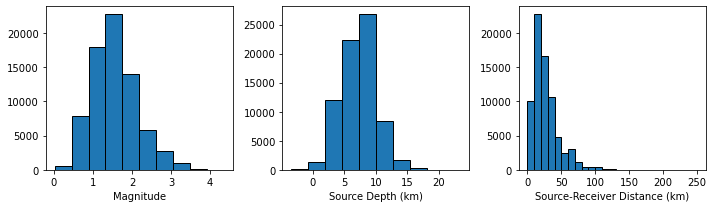

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes[0].hist(df_original["magnitude"], edgecolor="k")
axes[0].set_xlabel("Magnitude")
axes[1].hist(df_original["source_depth_km"], edgecolor="k")
axes[1].set_xlabel("Source Depth (km)")
axes[2].hist(df_original["source_receiver_distance_km"], edgecolor="k", bins=np.arange(0, 260, 10));
axes[2].set_xlabel("Source-Receiver Distance (km)")
fig.tight_layout()

In [7]:
df_original["magnitude_type"].value_counts()

l    72952
Name: magnitude_type, dtype: int64

In [8]:
# Get metadata for 1 and 3c stations
eq_meta_onec = pd.read_csv("currentEarthquakeArrivalInformation1CWithGains.csv")
eq_meta_threec = pd.read_csv("currentEarthquakeArrivalInformation3CWithGains.csv")
eq_meta_all = pd.concat([eq_meta_onec, eq_meta_threec])

# Reduce to just location information
all_eq_locs = eq_meta_all.drop_duplicates("evid")[["evid", "event_lat", "event_lon", "origin_time"]]
all_eq_locs.columns = ["event_identifier", "event_lat", "event_lon", "origin_time"]

# Reduce to events in the dataset 
eq_locs_df = all_eq_locs[np.isin(all_eq_locs.event_identifier, df_original.event_identifier.unique())]
# Make date column for filtering
eq_locs_df.loc[:, "date"] = eq_locs_df.origin_time.apply(lambda x: int(UTCDateTime(x).strftime("%y%m%d")))

# Set filter bounds
lat_min = 44.680
lat_max = 44.870
lon_max = 110.850
lon_min = 110.640
date_min = 130901  # YYMMDD
date_max = 140630  # YYMMDD
bounds = {"lat_min": lat_min,
          "lat_max": lat_max,
          "lon_max": lon_max,
          "lon_min": lon_min,
          "date_min": date_min,
          "date_max": date_max}

# Get ngb event ids
ngb_event_locs = eq_locs_df.loc[
        (eq_locs_df["date"] >= bounds["date_min"]) & (eq_locs_df["date"] <= bounds["date_max"]) & (eq_locs_df["event_lat"] >= bounds["lat_min"])
        & (eq_locs_df["event_lat"] <= bounds["lat_max"]) & (-1 * eq_locs_df["event_lon"] >= bounds["lon_min"]) & (
                    -1 * eq_locs_df["event_lon"] <= bounds["lon_max"])]

df_ngb_removed = df_original[~np.isin(df_original.event_identifier, ngb_event_locs.event_identifier)]
df_ngb = df_original[np.isin(df_original.event_identifier, ngb_event_locs.event_identifier)]
np.where(np.isin(df_ngb_removed.event_identifier, df_ngb.event_identifier))

/tmp/ipykernel_26785/2841456811.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  eq_meta_threec = pd.read_csv("currentEarthquakeArrivalInformation3CWithGains.csv")
/tmp/ipykernel_26785/2841456811.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_locs_df.loc[:, "date"] = eq_locs_df.origin_time.apply(lambda x: int(UTCDateTime(x).strftime("%y%m%d")))


(array([], dtype=int64),)

## Look at some information per station

In [9]:
# station_summary_stats = df_original.groupby("station").agg({'source_receiver_distance_km': ['mean', 'min', 'max'], "magnitude":['mean', 'min', 'max']})
# station_summary_stats

In [10]:
print(len(df_ngb_removed["station"].unique()))
stat_counts = df_ngb_removed.value_counts("station").to_frame().reset_index()
stat_counts.columns = ["Station", "Count"]
stat_counts_le50km = df_ngb_removed[df_ngb_removed["source_receiver_distance_km"] <= 50].value_counts("station").to_frame().reset_index()
stat_counts_le50km.columns = ["Station", "Count_le50km"]

stat_counts = stat_counts.merge(stat_counts_le50km, on="Station", how="left")
stat_counts

60


,Station,Count,Count_le50km
0,YNR,4505,4476.0
1,YHH,4351,4173.0
2,YMC,3992,3846.0
3,YPM,3605,3587.0
4,YMR,3571,3489.0
5,YWB,3457,3390.0
6,MCID,3399,487.0
7,YFT,3248,3237.0
8,YHB,3133,3011.0
9,YHL,3053,2892.0


In [11]:
def plot_box_whisker(df, feature, ylabel=None, sort_counts=True, thresholds=None, showfliers=True):
    fig = plt.figure(figsize=(15, 5))
    station_feat = df.groupby("station").apply(lambda x: x[feature].values).to_frame()
    station_feat.columns = ["values"]
    if sort_counts:
        station_feat.loc[:, "counts"] = station_feat.apply(lambda x: len(x["values"]), axis=1)
        station_feat = station_feat.sort_values("counts", ascending=False)
        
    if thresholds is not None:
        for thresh in thresholds: 
            thresh_ind = np.where(station_feat.counts < thresh)[0][0] + 0.5
            plt.axvline(thresh_ind, color="red", alpha=0.5)

    labels = station_feat.index
    plt.boxplot(station_feat["values"].to_numpy(), showfliers=showfliers);
    plt.xticks(range(1, len(labels)+1), labels=labels, rotation="vertical");
    if ylabel is None:
        ylabel = feature
    plt.ylabel(ylabel)

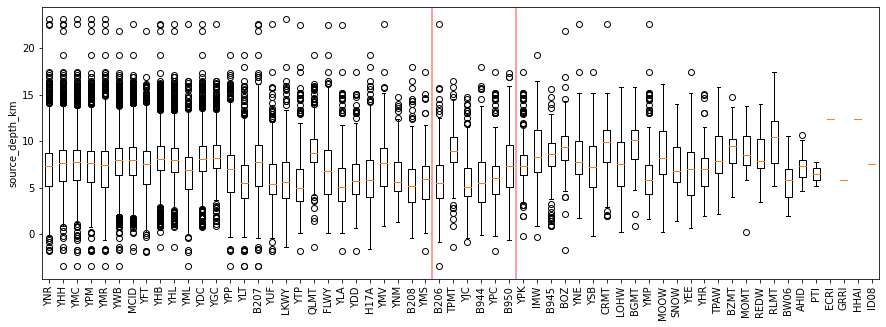

In [12]:
plot_box_whisker(df_ngb_removed, "source_depth_km", thresholds=[350, 500])

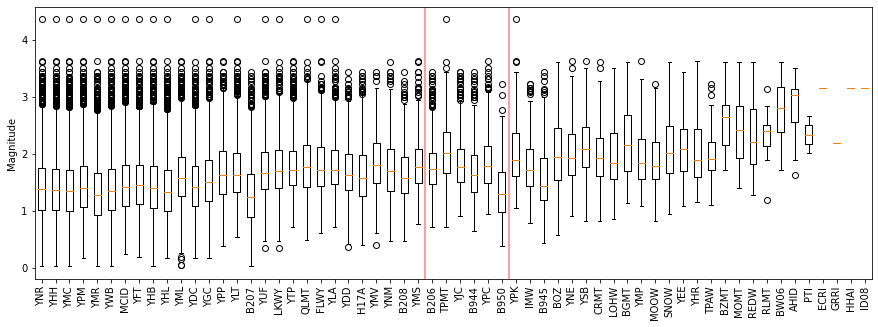

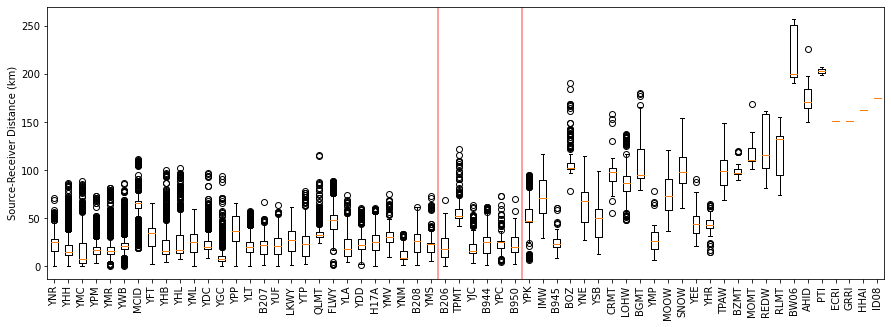

In [11]:
plot_box_whisker(df_ngb_removed, "magnitude", "Magnitude", thresholds=[350, 500])
plot_box_whisker(df_ngb_removed, "source_receiver_distance_km", "Source-Receiver Distance (km)", thresholds=[350, 500])

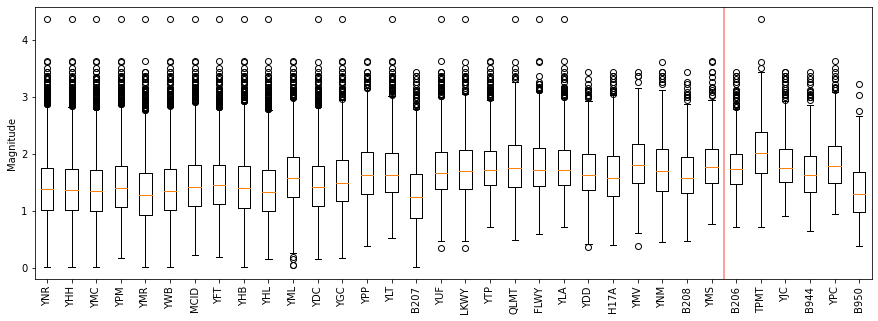

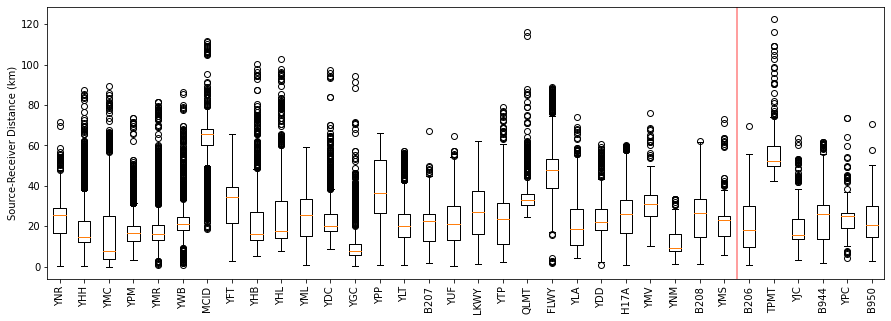

In [12]:
# Keep stations with more than 350 observations
df_org_filtcounts = df_ngb_removed[np.isin(df_ngb_removed.station, stat_counts[stat_counts.Count >= 350])]
plot_box_whisker(df_org_filtcounts, "magnitude", "Magnitude", thresholds=[500])
plot_box_whisker(df_org_filtcounts, "source_receiver_distance_km", "Source-Receiver Distance (km)", thresholds=[500])

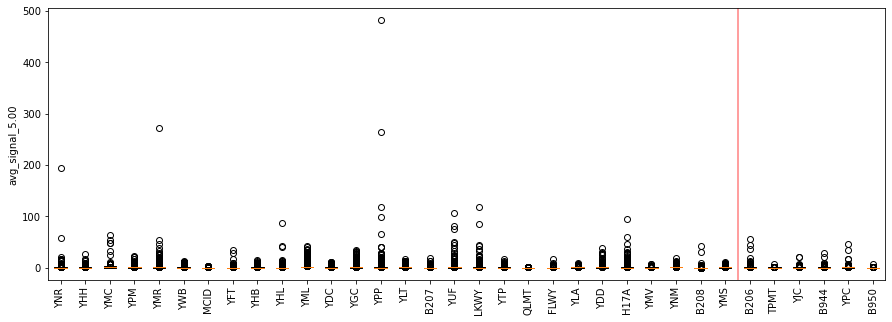

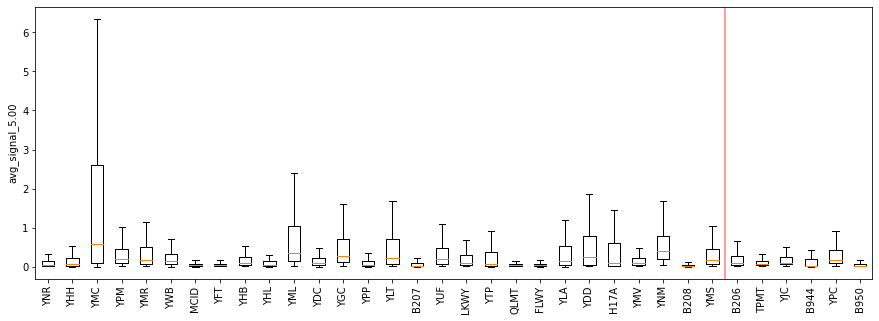

In [13]:
plot_box_whisker(df_org_filtcounts, "avg_signal_5.00", "avg_signal_5.00", thresholds=[500])
plot_box_whisker(df_org_filtcounts, "avg_signal_5.00", "avg_signal_5.00", thresholds=[500], showfliers=False)

In [14]:
df_original["network"].value_counts()

WY    61885
PB     4995
MB     2053
IW     1741
US     1602
TA      669
IE        6
GS        1
Name: network, dtype: int64

In [15]:
df_ngb_removed["network"].value_counts()

WY    54949
PB     3625
MB     1895
IW     1715
US     1460
TA      563
IE        5
GS        1
Name: network, dtype: int64

In [16]:
df_org_filtcounts["network"].value_counts()

WY    53790
PB     3334
MB     1387
US     1152
IW      856
TA      563
Name: network, dtype: int64

In [17]:
np.sort(df_ngb_removed.apply(lambda x: f"{x.network}.{x.station}", axis=1).unique())

array(['GS.ID08', 'IE.ECRI', 'IE.GRRI', 'IE.HHAI', 'IE.PTI', 'IW.FLWY',
       'IW.IMW', 'IW.LOHW', 'IW.MOOW', 'IW.REDW', 'IW.SNOW', 'IW.TPAW',
       'MB.BGMT', 'MB.BZMT', 'MB.CRMT', 'MB.MOMT', 'MB.QLMT', 'MB.TPMT',
       'PB.B206', 'PB.B207', 'PB.B208', 'PB.B944', 'PB.B945', 'PB.B950',
       'TA.H17A', 'US.AHID', 'US.BOZ', 'US.BW06', 'US.LKWY', 'US.RLMT',
       'WY.MCID', 'WY.YDC', 'WY.YDD', 'WY.YEE', 'WY.YFT', 'WY.YGC',
       'WY.YHB', 'WY.YHH', 'WY.YHL', 'WY.YHR', 'WY.YJC', 'WY.YLA',
       'WY.YLT', 'WY.YMC', 'WY.YML', 'WY.YMP', 'WY.YMR', 'WY.YMS',
       'WY.YMV', 'WY.YNE', 'WY.YNM', 'WY.YNR', 'WY.YPC', 'WY.YPK',
       'WY.YPM', 'WY.YPP', 'WY.YSB', 'WY.YTP', 'WY.YUF', 'WY.YWB'],
      dtype=object)

In [18]:
# No examples from historical catalog 
print(df_ngb_removed["event_identifier"].min(), df_ngb_removed["event_identifier"].max())

60000622 60475767


In [19]:
# Read in station information
stat_df = pd.read_csv("gmap-stations.txt", sep='|', skiprows=[1, 2], skipinitialspace=True)
# Only keep stations that are in the dataset
stat_df = stat_df[np.isin(stat_df.Station, df_ngb_removed.station.unique())]
stat_df.head()

,Network,Station,Latitude,Longitude,Elevation,Sitename,StartTime,EndTime
68,GS,ID08,42.896000,-111.838890,2054.0,"Devils Gate, Idaho, USA",2017-09-09T00:00:00,2017-10-25T20:14:00
77,IE,ECRI,43.054001,-111.371002,2086.0,"Eagle Creek, Idaho, USA",2002-01-01T00:00:00,2599-12-31T23:59:59
78,IE,GRRI,42.938000,-111.421997,2207.0,"Grays Lake, Idaho, USA",2002-01-01T00:00:00,2599-12-31T23:59:59
79,IE,HHAI,43.294998,-112.379501,1391.0,"Hells Half Acre, Idaho, USA",2002-01-01T00:00:00,2599-12-31T23:59:59
102,IW,FLWY,44.083002,-110.699888,2078.0,"Flagg Ranch, Wyoming, USA",2005-08-17T00:00:00,2599-12-31T23:59:59


In [20]:
# Check if any station information is missing 
print(len(stat_counts), len(stat_df.Station.unique()))
df_ngb_removed.station.unique()[~np.isin(df_ngb_removed.station.unique(), stat_df.Station)]

60 60


array([], dtype=object)

In [21]:
# Look at stations with duplicate information 
stat_df[stat_df.duplicated("Station", keep=False)].sort_values(["Station", "EndTime"])

,Network,Station,Latitude,Longitude,Elevation,Sitename,StartTime,EndTime
147,PB,B206,44.717701,-110.511703,2399.5,"canyon206bwy2008, Yellowstone, WY, USA",2008-06-27T00:00:00,2599-12-31T23:59:59
1199,PB,B206,44.717700,-110.511700,2399.5,"canyon206bwy2008, Yellowstone, WY, USA",2599-12-31T23:59:59,3000-01-01T00:00:00
148,PB,B207,44.619000,-110.848500,2182.0,"madisn207bwy2007, Yellowstone, Wy, USA",2007-10-17T00:00:00,2599-12-31T23:59:59
1135,PB,B207,44.619000,-110.848500,2182.0,"madisn207bwy2007, Yellowstone, Wy, USA",2599-12-31T23:59:59,3000-01-01T00:00:00
149,PB,B208,44.560200,-110.401500,2405.8,"lakejn208bwy2007, Yellowstone, Wy, USA",2007-10-31T00:00:00,2599-12-31T23:59:59
1136,PB,B208,44.560200,-110.401500,2405.8,"lakejn208bwy2007, Yellowstone, Wy, USA",2599-12-31T23:59:59,3000-01-01T00:00:00
150,PB,B944,44.389702,-110.543800,2364.6,"grantt944bwy2008, Yellowstone, WY, USA",2008-08-06T00:00:00,2599-12-31T23:59:59
1200,PB,B944,44.389700,-110.543800,2364.6,"grantt944bwy2008, Yellowstone, WY, USA",2599-12-31T23:59:59,3000-01-01T00:00:00
151,PB,B945,44.894001,-110.744102,2241.4,"panthr945swy2008, Yellowstone, WY, USA",2008-09-04T00:00:00,2599-12-31T23:59:59
1137,PB,B945,44.894001,-110.744102,2241.4,"panthr945swy2008, Yellowstone, WY, USA",2599-12-31T23:59:59,3000-01-01T00:00:00


In [22]:
# Keep most recent station information
stat_df_unique = stat_df.sort_values(["Station", "EndTime"]).drop_duplicates("Station", keep='last')
stat_df_unique = stat_df_unique.merge(stat_counts)
len(stat_df_unique)

60

In [23]:
# Read in park and caldera boundaries
utahnet_path = "../maps/utahnet"
ys_border = pd.read_csv(f"{utahnet_path}/yell.border.g", delimiter=" ", names=["Longitude", "Latitude"], dtype=np.float64)
caldera = pd.read_csv(f"{utahnet_path}/caldera.ys", sep="\s+", names=["Latitude", "Longitude"], dtype=np.float64)

caldera = caldera.drop(caldera[caldera["Longitude"]==0].index)
caldera = caldera[["Longitude", "Latitude"]]
caldera["Longitude"] = caldera["Longitude"]*-1
caldera

,Longitude,Latitude
0,-110.6149,44.7057
1,-110.6154,44.7040
2,-110.6158,44.7023
3,-110.6162,44.7003
4,-110.6158,44.6986
...,...,...
881,-110.6137,44.7119
882,-110.6145,44.7102
883,-110.6153,44.7082
884,-110.6161,44.7068


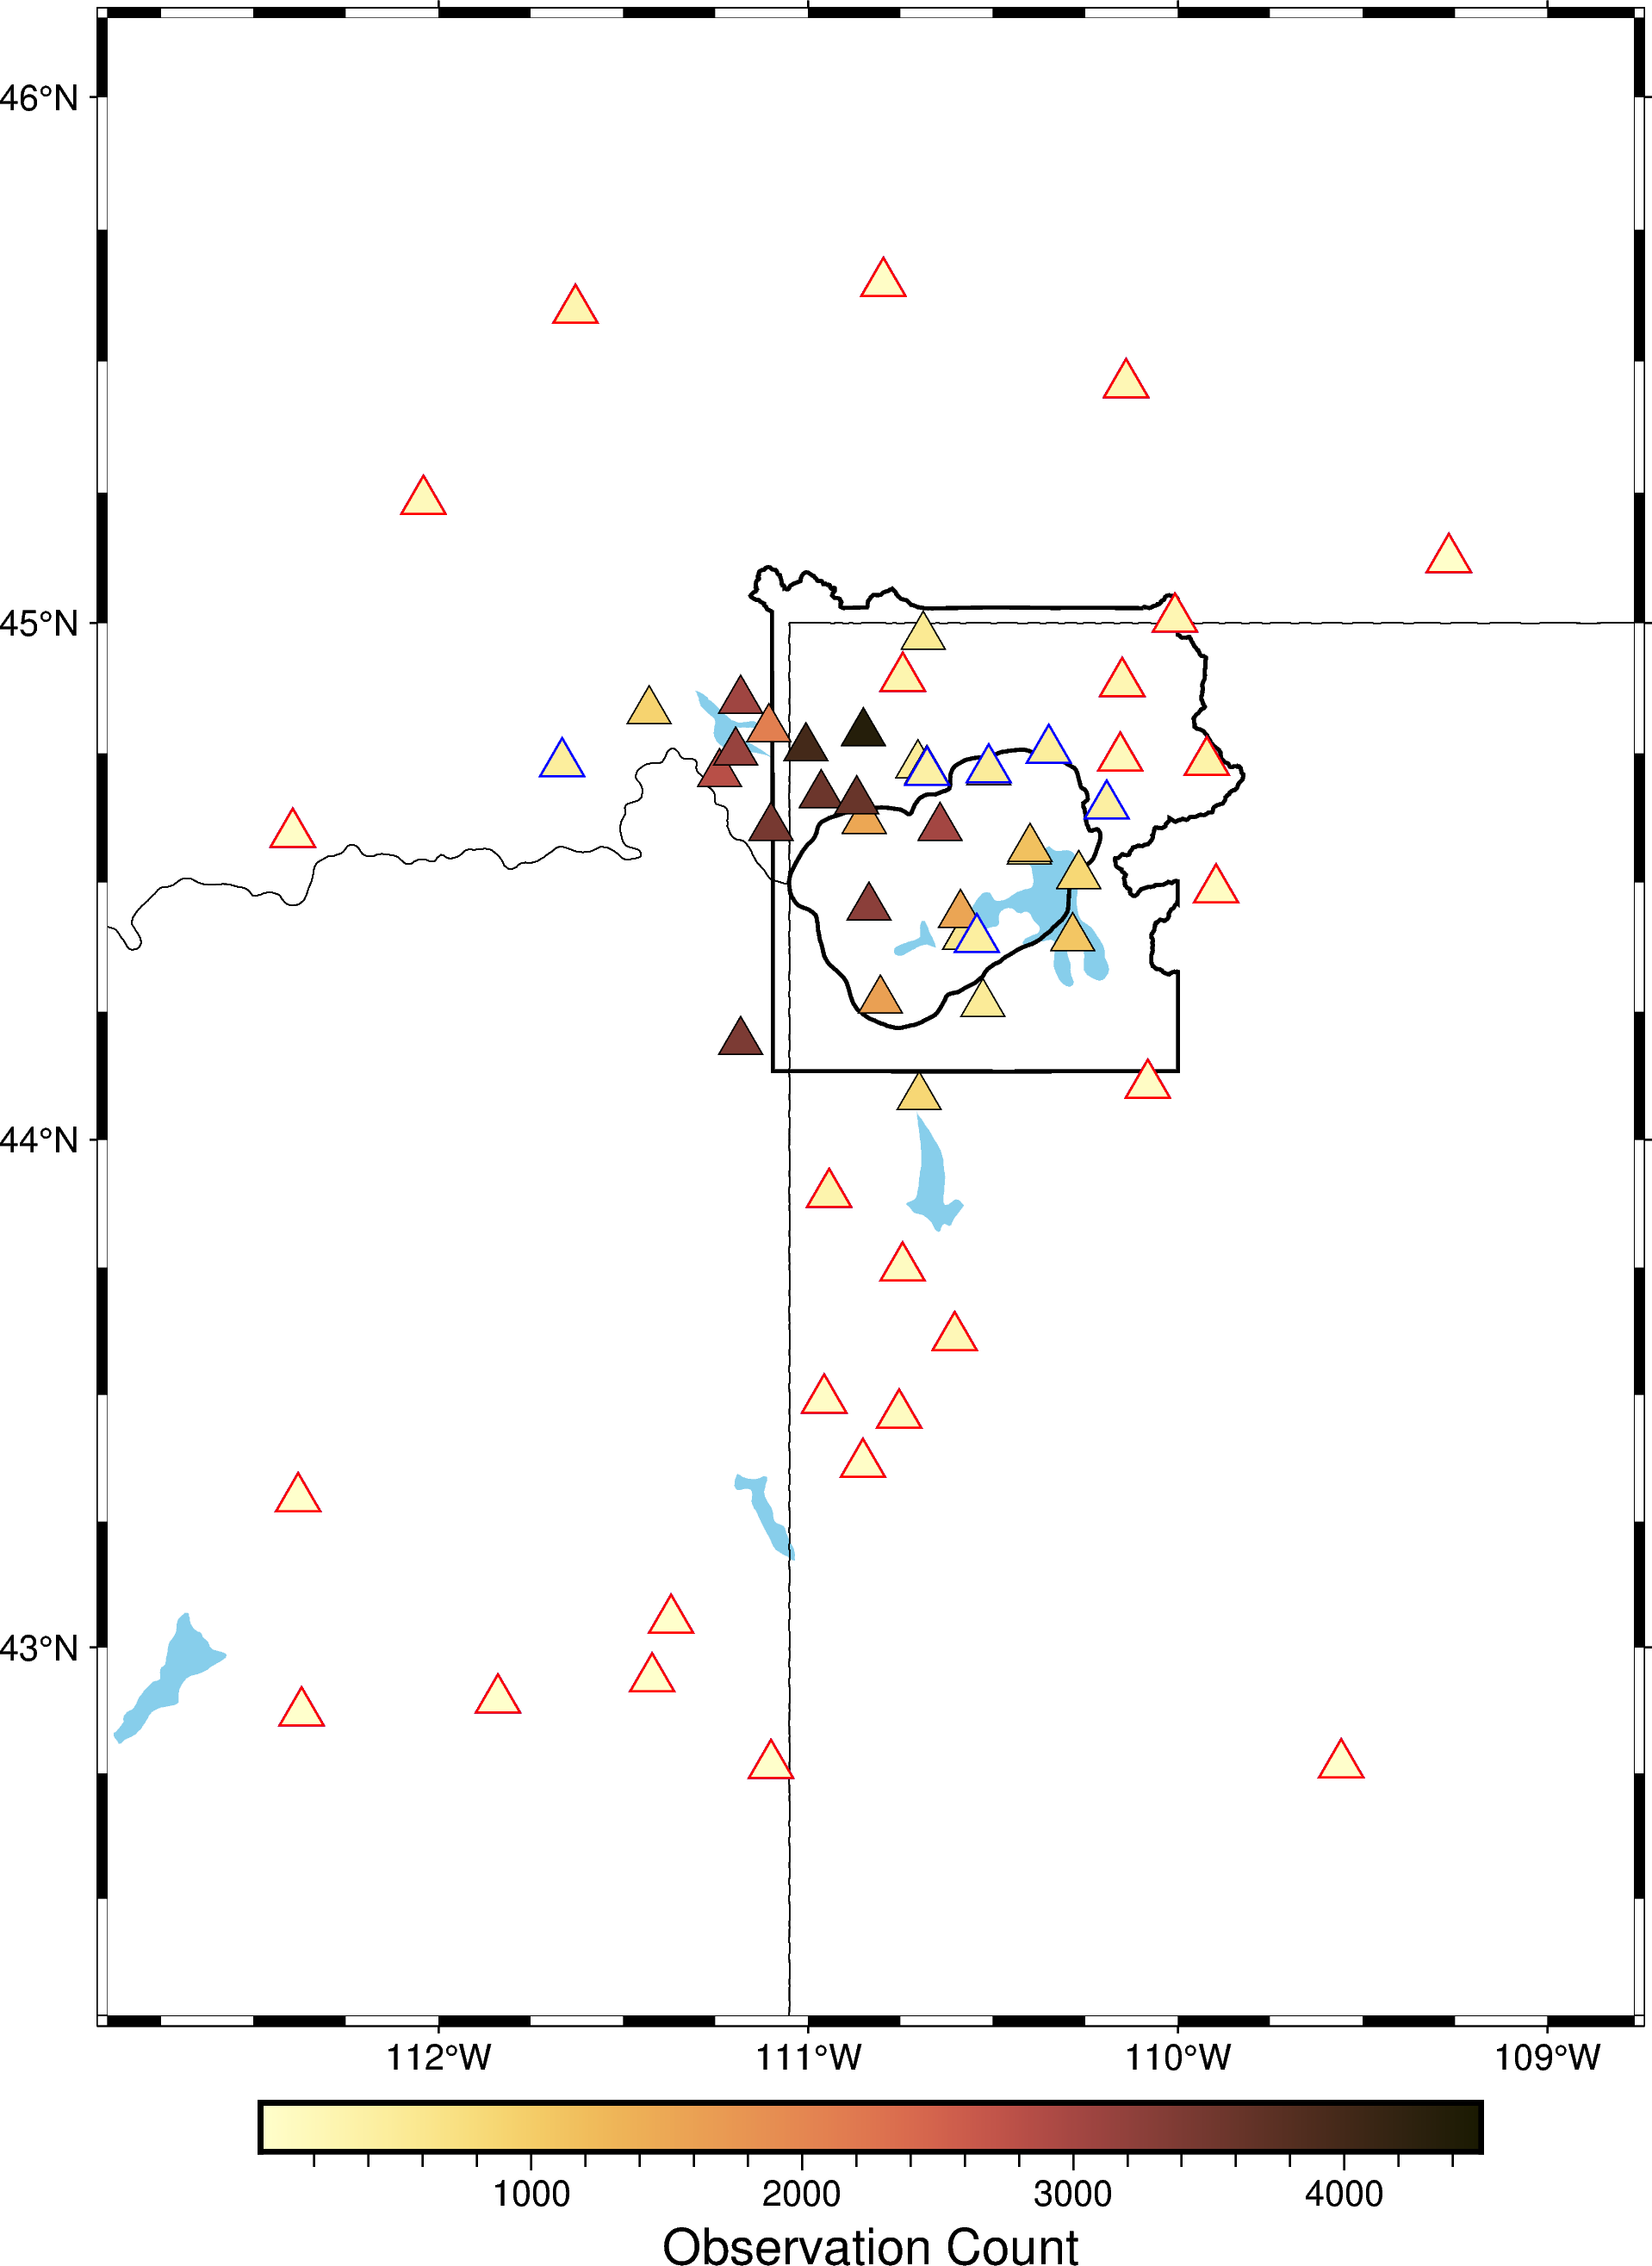

In [24]:
#Draw station map 
region = [
    stat_df_unique.Longitude.min() - 0.5,
    stat_df_unique.Longitude.max() + 0.5,
    stat_df_unique.Latitude.min() - 0.5,
    stat_df_unique.Latitude.max() + 0.5,
]
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="white", borders=2, water="skyblue")
pygmt.makecpt(cmap="lajolla", series=[stat_df_unique.Count.min(), stat_df_unique.Count.max()])
fig.plot(data=ys_border, pen="1.0p,black")
fig.plot(data=caldera, pen='1.0p,black')
fig.plot(x=stat_df_unique[stat_df_unique.Count >= 500].Longitude, y=stat_df_unique[stat_df_unique.Count >= 500].Latitude, style="t0.5c", color=stat_df_unique[stat_df_unique.Count >= 500].Count, cmap=True, pen="black")
fig.plot(x=stat_df_unique[stat_df_unique.Count < 500].Longitude, y=stat_df_unique[stat_df_unique.Count < 500].Latitude, style="t0.5c", color=stat_df_unique[stat_df_unique.Count < 500].Count, cmap=True, pen="0.5p,blue")
fig.plot(x=stat_df_unique[stat_df_unique.Count < 350].Longitude, y=stat_df_unique[stat_df_unique.Count < 350].Latitude, style="t0.5c", color=stat_df_unique[stat_df_unique.Count < 350].Count, cmap=True, pen="0.5p,red")
fig.colorbar(frame='af+l"Observation Count"')
fig.show()

## Examine features for outliers?

In [25]:
def plot_station_feature_relationship(df, feature_x, feature_y, ylim=None, xlim=None):
    stats = df.station.unique()
    nrows = 6
    fig, axs = plt.subplots(len(stats)//6, nrows, figsize=(15,15))
    for stat, ax in zip(stats, axs.reshape(-1)):
        stat_df = df[df["station"] == stat]
        network = stat_df["network"].unique()
        ax.scatter(stat_df[stat_df["source_receiver_distance_km"] < 50][feature_x], 
                   stat_df[stat_df["source_receiver_distance_km"] < 50][feature_y], label="< 50 km")
        ax.scatter(stat_df[stat_df["source_receiver_distance_km"] >= 50][feature_x], 
                   stat_df[stat_df["source_receiver_distance_km"] >= 50][feature_y], color="r", label="> 50 km")

        if len(network) > 1:
            print(f"More than 1 network for station {station}: {network}")
            ax.text(0.7, 0.1, stat, transform=ax.transAxes)
        ax.text(0.6, 0.1, f"{network[0]}.{stat}", transform=ax.transAxes)
        if ylim is not None:
            ax.set_ylim(ylim)
        if xlim is not None:
            ax.set_xlim(xlim)
    ax.legend()
    fig.supylabel(feature_y, fontsize=20)
    fig.supxlabel(feature_x, fontsize=20)
    fig.tight_layout()

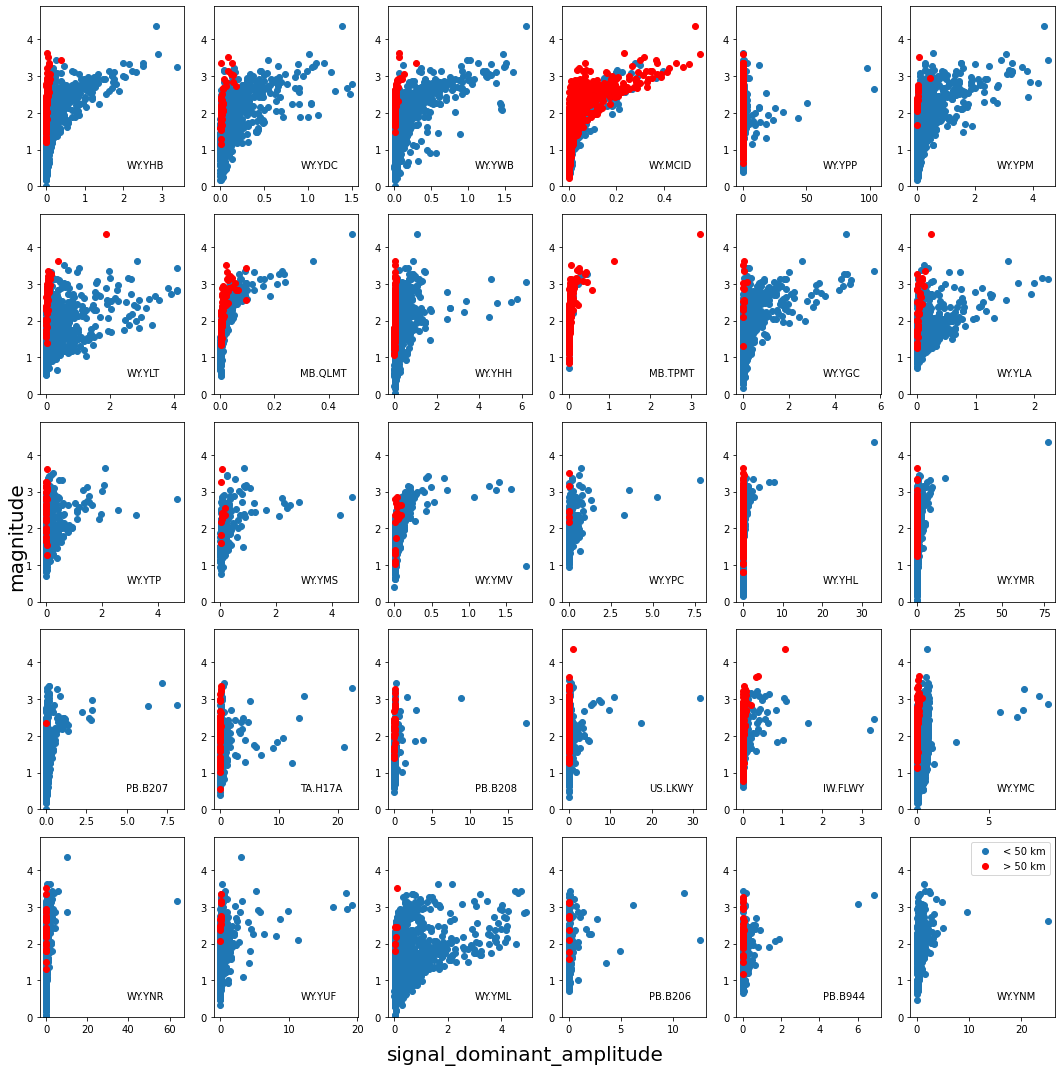

In [26]:
plot_station_feature_relationship(df_org_filtcounts, "signal_dominant_amplitude", "magnitude", ylim=[0, 4.9])

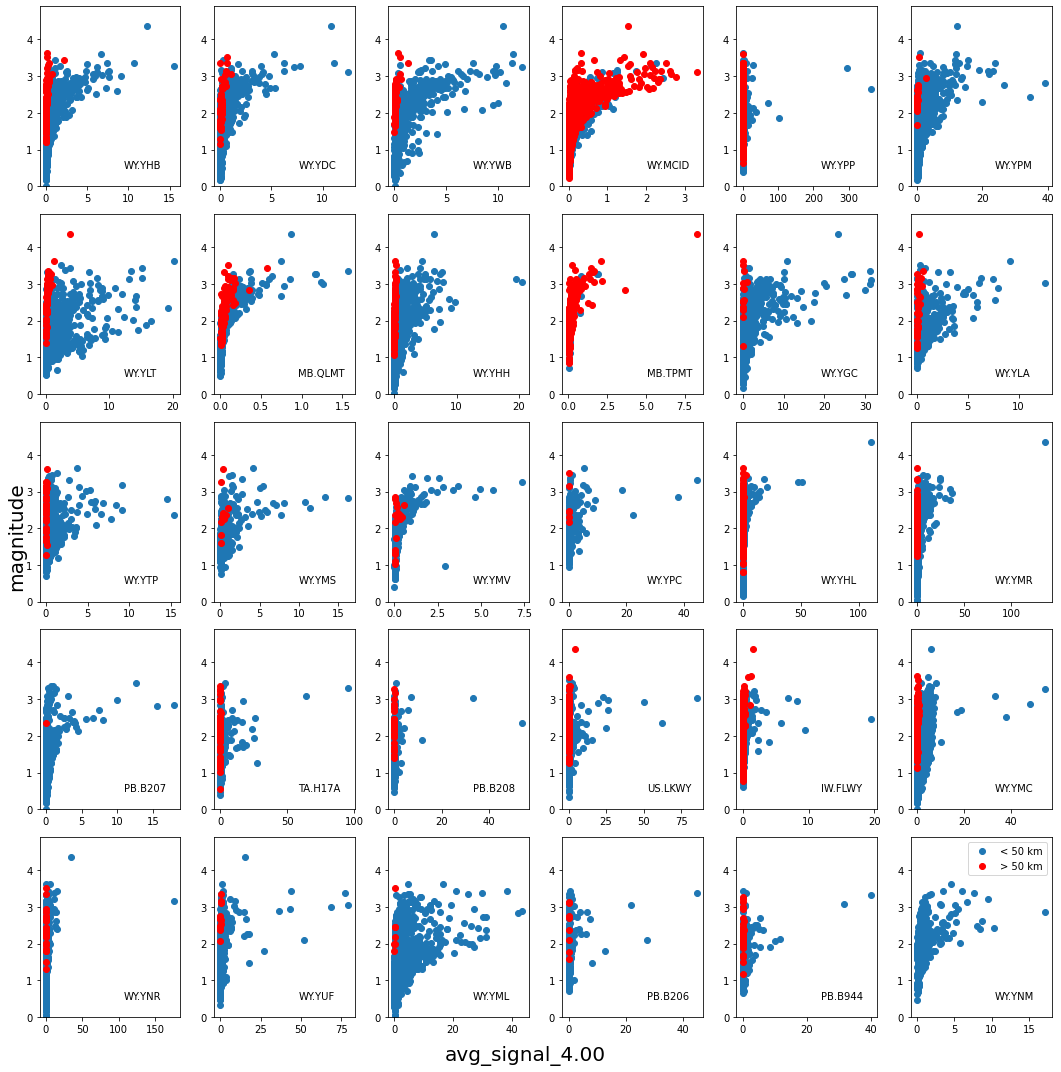

In [27]:
plot_station_feature_relationship(df_org_filtcounts, "avg_signal_4.00", "magnitude", ylim=[0, 4.9])

## Feature selection?

In [28]:
df_org_filtcounts.loc[:, "stat_id"] = df_org_filtcounts.apply(lambda x: f"{x.network}.{x.station}", axis=1)

/tmp/ipykernel_7816/3698869426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org_filtcounts.loc[:, "stat_id"] = df_org_filtcounts.apply(lambda x: f"{x.network}.{x.station}", axis=1)


In [29]:
# Make train and test datasets

test_size = 0.2

evids = np.unique(df_org_filtcounts.event_identifier)
train_evids, test_evids = train_test_split(evids, test_size = test_size, random_state = 843823)

train_inds = np.isin(df_org_filtcounts.event_identifier, train_evids)
train_df = df_org_filtcounts[train_inds]
test_df = df_org_filtcounts[~train_inds]

assert len(train_df.event_identifier.unique()) == len(train_evids)
assert len(test_df.event_identifier.unique()) == len(test_evids)
assert len(test_df) + len(train_df) == len(df_org_filtcounts)

In [30]:
split_station_counts = train_df.station.value_counts().to_frame().reset_index()
split_station_counts = split_station_counts.merge(test_df.station.value_counts().to_frame().reset_index(), on="index")
split_station_counts.columns = ["station", "train_count", "test_count"]
split_station_counts.loc[:, "test_frac"] = split_station_counts.apply(lambda x: x.test_count/(x.test_count + x.train_count), axis=1)
split_station_counts.sort_values("test_frac")

,station,train_count,test_count,test_frac
15,B207,1228,290,0.191041
9,YML,2440,583,0.192855
4,YMR,2881,690,0.193223
3,YPM,2904,701,0.194452
13,YPP,1300,315,0.195046
14,YLT,1235,300,0.195440
12,YGC,1700,414,0.195837
2,YMC,3209,783,0.196142
11,YDC,2258,551,0.196155
0,YNR,3621,884,0.196226


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
ohe = OneHotEncoder(sparse=False)
stat_feats = ohe.fit_transform(train_df["stat_id"].values.reshape(-1, 1))
stat_feats[:2, :]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [33]:
# Computes the feature matrix from a dataframe
def compute_full_feature_matrix(df, stat_features=None):
    # Loosely speaking empirical magnitudes look like:
    # M = log10(A) + Q(Delta) 
    # where A is the amplitude and Q a distance dependent correction term.
    # Additionally, the difference between log10 and log amounts to a scalar
    # that a machine can learn.
    # Basically, I'm interested in features that:
    #   (1) Measure size in, potentially, different amplitudes.
    # different `passbands' deviates from the noise, 
    n_rows = len(df)
    n_columns = 48
    X = np.zeros([n_rows, n_columns])
    # Get a proxy on size
    
    # These are effectively amplitude ratios.  Note,
    # log(a/b) = log(a) - log(b)
    X[:,0]  = np.log(df['avg_signal_1.00']) - np.log(df['avg_noise_1.00'])
    X[:,1]  = np.log(df['avg_signal_2.00']) - np.log(df['avg_noise_2.00'])
    X[:,2]  = np.log(df['avg_signal_3.00']) - np.log(df['avg_noise_3.00'])
    X[:,3]  = np.log(df['avg_signal_4.00']) - np.log(df['avg_noise_4.00'])
    X[:,4]  = np.log(df['avg_signal_5.00']) - np.log(df['avg_noise_5.00'])
    X[:,5]  = np.log(df['avg_signal_6.00']) - np.log(df['avg_noise_6.00'])
    X[:,6]  = np.log(df['avg_signal_7.00']) - np.log(df['avg_noise_7.00'])
    X[:,7]  = np.log(df['avg_signal_8.00']) - np.log(df['avg_noise_8.00'])
    X[:,8]  = np.log(df['avg_signal_9.00']) - np.log(df['avg_noise_9.00'])
    X[:,9]  = np.log(df['avg_signal_10.00']) - np.log(df['avg_noise_10.00'])
    X[:,10] = np.log(df['avg_signal_11.00']) - np.log(df['avg_noise_11.00'])
    X[:,11] = np.log(df['avg_signal_12.00']) - np.log(df['avg_noise_12.00'])
    X[:,12] = np.log(df['avg_signal_13.00']) - np.log(df['avg_noise_13.00'])
    X[:,13] = np.log(df['avg_signal_14.00']) - np.log(df['avg_noise_14.00'])
    X[:,14] = np.log(df['avg_signal_15.00']) - np.log(df['avg_noise_15.00'])
    X[:,15] = np.log(df['avg_signal_16.00']) - np.log(df['avg_noise_16.00'])
    X[:,16] = np.log(df['avg_signal_17.00']) - np.log(df['avg_noise_17.00'])
    X[:,17] = np.log(df['avg_signal_18.00']) - np.log(df['avg_noise_18.00'])
    # Look at amplitudes
    X[:,18] = np.log(df['avg_signal_1.00']) 
    X[:,19] = np.log(df['avg_signal_2.00']) 
    X[:,20] = np.log(df['avg_signal_3.00']) 
    X[:,21] = np.log(df['avg_signal_4.00']) 
    X[:,22] = np.log(df['avg_signal_5.00'])
    X[:,23] = np.log(df['avg_signal_6.00'])
    X[:,24] = np.log(df['avg_signal_7.00'])
    X[:,25] = np.log(df['avg_signal_8.00'])
    X[:,26] = np.log(df['avg_signal_9.00'])
    X[:,27] = np.log(df['avg_signal_10.00'])
    X[:,28] = np.log(df['avg_signal_11.00'])
    X[:,29] = np.log(df['avg_signal_12.00'])
    X[:,30] = np.log(df['avg_signal_13.00'])
    X[:,31] = np.log(df['avg_signal_14.00'])
    X[:,32] = np.log(df['avg_signal_15.00'])
    X[:,33] = np.log(df['avg_signal_16.00'])
    X[:,34] = np.log(df['avg_signal_17.00'])
    X[:,35] = np.log(df['avg_signal_18.00'])
    # Frequency and max amplitude
    X[:,36] = np.log(df['signal_dominant_frequency'])
    X[:,37] = np.log(df['signal_dominant_amplitude'])
    # Time-based featuers: Look at max amplitudes of noise/signal
    X[:,38] = np.log(df['noise_maximum_value']  - df['noise_minimum_value'])
    X[:,39] = np.log(df['signal_maximum_value'] - df['signal_minimum_value'])
    X[:,40] = np.log(df['signal_variance'])
    X[:,41] = np.log(df['noise_variance'])
    # Source/recv distance (take log to flatten this)
    X[:,42] = np.log(df['source_receiver_distance_km'])
    X[:,43] = df['source_depth_km']
    # Single stations can learn location
    X[:,44] = np.sin(df['source_receiver_back_azimuth'])
    X[:,45] = df['source_receiver_back_azimuth']
    X[:,46] = df['source_latitude']
    X[:,47] = df['source_longitude']
    
    if stat_features is not None:
        print(X.shape)
        X = np.concatenate([X, stat_feats], axis=1)
        print(X.shape)
    
    # Standardize features
#     if (scaler is None):
#         scaler = StandardScaler()
#         scaler = scaler.fit(X)
#     X = scaler.transform(X)
    return X #scaler
    
#X, scaler = compute_feature_matrix(df)

In [34]:
# 'amp_ratio_04.0', 'amp_01.0', 'amp_02.0', 'amp_03.0', 'amp_07.0',
#        'amp_12.0', 'amp_17.0', 'amp_18.0', 'signal_max_amplitude',
#        'signal_variance', 'source_receiver_distance_logkm',
#        'source_depth_km', 'receiver_back_azimuth'

def compute_sfs_feature_matrix(df, stat_features=None):
    # Loosely speaking empirical magnitudes look like:
    # M = log10(A) + Q(Delta) 
    # where A is the amplitude and Q a distance dependent correction term.
    # Additionally, the difference between log10 and log amounts to a scalar
    # that a machine can learn.
    # Basically, I'm interested in features that:
    #   (1) Measure size in, potentially, different amplitudes.
    # different `passbands' deviates from the noise, 
    n_rows = len(df)
    n_columns = 13
    X = np.zeros([n_rows, n_columns])
    # Get a proxy on size
    
    # These are effectively amplitude ratios.  Note,
    # log(a/b) = log(a) - log(b)
    X[:,0]  = np.log(df['avg_signal_4.00']) - np.log(df['avg_noise_4.00'])
    # Look at amplitudes
    X[:,1] = np.log(df['avg_signal_1.00']) 
    X[:,2] = np.log(df['avg_signal_2.00']) 
    X[:,3] = np.log(df['avg_signal_3.00']) 
    X[:,4] = np.log(df['avg_signal_7.00'])
    X[:,5] = np.log(df['avg_signal_12.00'])
    X[:,6] = np.log(df['avg_signal_17.00'])
    X[:,7] = np.log(df['avg_signal_18.00'])
    # Time-based featuers: Look at max amplitudes of noise/signal
    X[:,8] = np.log(df['signal_maximum_value'] - df['signal_minimum_value'])
    X[:,9] = np.log(df['signal_variance'])
    # Source/recv distance (take log to flatten this)
    X[:,10] = np.log(df['source_receiver_distance_km'])
    X[:,11] = df['source_depth_km']
    # Single stations can learn location
    X[:,12] = df['source_receiver_back_azimuth']
    
    if stat_features is not None:
        print(X.shape)
        X = np.concatenate([X, stat_feats], axis=1)
        print(X.shape)
    
    return X

In [35]:
from sklearn.model_selection import KFold
evids = train_df.event_identifier.unique()
kf = KFold(n_splits=5, shuffle=True, random_state=843824)
folds = []
for train_index, test_index in kf.split(evids):
    # Get the evids corresponding to the split indicies
    fold_train_evids = evids[train_index]
    fold_test_evids = evids[test_index]
    # Get rows of training dataset that correspond to split evids
    fold_train_inds = np.where(np.isin(train_df.event_identifier, fold_train_evids))[0]
    fold_test_inds = np.where(np.isin(train_df.event_identifier, fold_test_evids))[0]
    
    folds.append((fold_train_inds, fold_test_inds))

In [36]:
train_feat_matrix = compute_full_feature_matrix(train_df, stat_feats)
train_y = train_df.magnitude.values

(48967, 48)
(48967, 82)


In [83]:
columns=["amp_ratio_01.0", "amp_ratio_02.0", "amp_ratio_03.0", "amp_ratio_04.0", 
                                 "amp_ratio_05.0", "amp_ratio_06.0", "amp_ratio_07.0", "amp_ratio_08.0",
                                 "amp_ratio_09.0", "amp_ratio_10.0", "amp_ratio_11.0", "amp_ratio_12.0", 
                                 "amp_ratio_13.0", "amp_ratio_14.0", "amp_ratio_15.0", "amp_ratio_16.0", 
                                 "amp_ratio_17.0", "amp_ratio_18.0", 
                                 "amp_01.0", "amp_02.0", "amp_03.0", "amp_04.0", 
                                 "amp_05.0", "amp_06.0", "amp_07.0", "amp_08.0",
                                 "amp_09.0", "amp_10.0", "amp_11.0", "amp_12.0", 
                                 "amp_13.0", "amp_14.0", "amp_15.0", "amp_16.0", 
                                 "amp_17.0", "amp_18.0",
                                 "signal_dominant_frequency", "signal_dominant_amplitude", 
                                 "noise_max_amplitude", "signal_max_amplitude", "signal_variance", "noise_variance",
                                 "source_receiver_distance_logkm", "source_depth_km", "sin_receiver_back_azimuth",
                                 "receiver_back_azimuth", "source_latitude", "source_longitude"]

columns = np.concatenate([columns, ohe.categories_[0]])

In [37]:
import xgboost as xgb

/home/armstrong/anaconda3/envs/ngb-swarm/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [69]:
param = {'max_depth': 10, 'eta': 1, 'objective': 'reg:squarederror'}
param['eval_metric'] = 'rmse'
param['nthread'] = 2

In [84]:
num_round = 20
dtrain = xgb.DMatrix(train_feat_matrix, label=train_y, feature_names=columns)
bst_cv = xgb.cv(param, dtrain, num_round, folds=folds, early_stopping_rounds=3, 
               callbacks=[xgb.callback.EvaluationMonitor(show_stdv=True)])

[0]	train-rmse:0.26594+0.00123	test-rmse:0.30230+0.00784
[1]	train-rmse:0.23714+0.00290	test-rmse:0.28905+0.00559
[2]	train-rmse:0.22368+0.00326	test-rmse:0.28550+0.00373
[3]	train-rmse:0.21096+0.00189	test-rmse:0.28421+0.00433
[4]	train-rmse:0.20120+0.00192	test-rmse:0.28381+0.00439
[5]	train-rmse:0.19433+0.00177	test-rmse:0.28434+0.00403
[6]	train-rmse:0.18772+0.00163	test-rmse:0.28577+0.00462
[7]	train-rmse:0.18021+0.00208	test-rmse:0.28697+0.00479


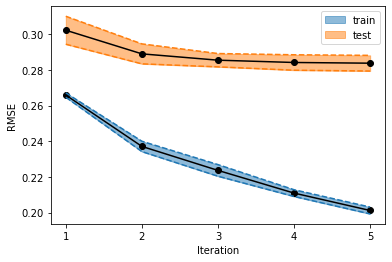

In [85]:
x_ticks = range(1, len(bst_cv)+1)
plt.plot(x_ticks, bst_cv["train-rmse-mean"], color="k", marker='o')
plt.plot(x_ticks, bst_cv["train-rmse-mean"]+bst_cv["train-rmse-std"], linestyle="--", color="C0")
plt.plot(x_ticks, bst_cv["train-rmse-mean"]-bst_cv["train-rmse-std"], linestyle="--", color="C0")
plt.fill_between(x_ticks,bst_cv["train-rmse-mean"]+bst_cv["train-rmse-std"], 
                 bst_cv["train-rmse-mean"]-bst_cv["train-rmse-std"], color="C0", alpha=0.5, label="train")

plt.plot(x_ticks, bst_cv["test-rmse-mean"], color="k", marker='o')
plt.plot(x_ticks, bst_cv["test-rmse-mean"]+bst_cv["test-rmse-std"], linestyle="--", color="C1")
plt.plot(x_ticks, bst_cv["test-rmse-mean"]-bst_cv["test-rmse-std"], linestyle="--", color="C1")
plt.fill_between(x_ticks, bst_cv["test-rmse-mean"]+bst_cv["test-rmse-std"], 
                 bst_cv["test-rmse-mean"]-bst_cv["test-rmse-std"], color="C1", alpha=0.5, label="test")

plt.ylabel("RMSE")
plt.xlabel("Iteration")

plt.xticks(x_ticks)
plt.legend()

In [87]:
num_round = 10

deval = train_feat_matrix[folds[0][1], :]
deval_y = train_y[folds[0][1]]
dtrain = train_feat_matrix[folds[0][0], :]
dtrain_y = train_y[folds[0][0]]
print(dtrain.shape, deval.shape)

dtrain = xgb.DMatrix(dtrain, label=dtrain_y, feature_names=columns)
deval = xgb.DMatrix(deval, label=deval_y, feature_names=columns)

evallist = [(deval, 'eval'), (dtrain, 'train')]

bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=2)

(39062, 82) (9905, 82)
[0]	eval-rmse:0.31792	train-rmse:0.26572
[1]	eval-rmse:0.30004	train-rmse:0.23554
[2]	eval-rmse:0.29278	train-rmse:0.22018
[3]	eval-rmse:0.29253	train-rmse:0.21027
[4]	eval-rmse:0.29179	train-rmse:0.19966
[5]	eval-rmse:0.29152	train-rmse:0.19255
[6]	eval-rmse:0.29409	train-rmse:0.18790
[7]	eval-rmse:0.29567	train-rmse:0.17889
[8]	eval-rmse:0.29710	train-rmse:0.17286
[9]	eval-rmse:0.29971	train-rmse:0.16439


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

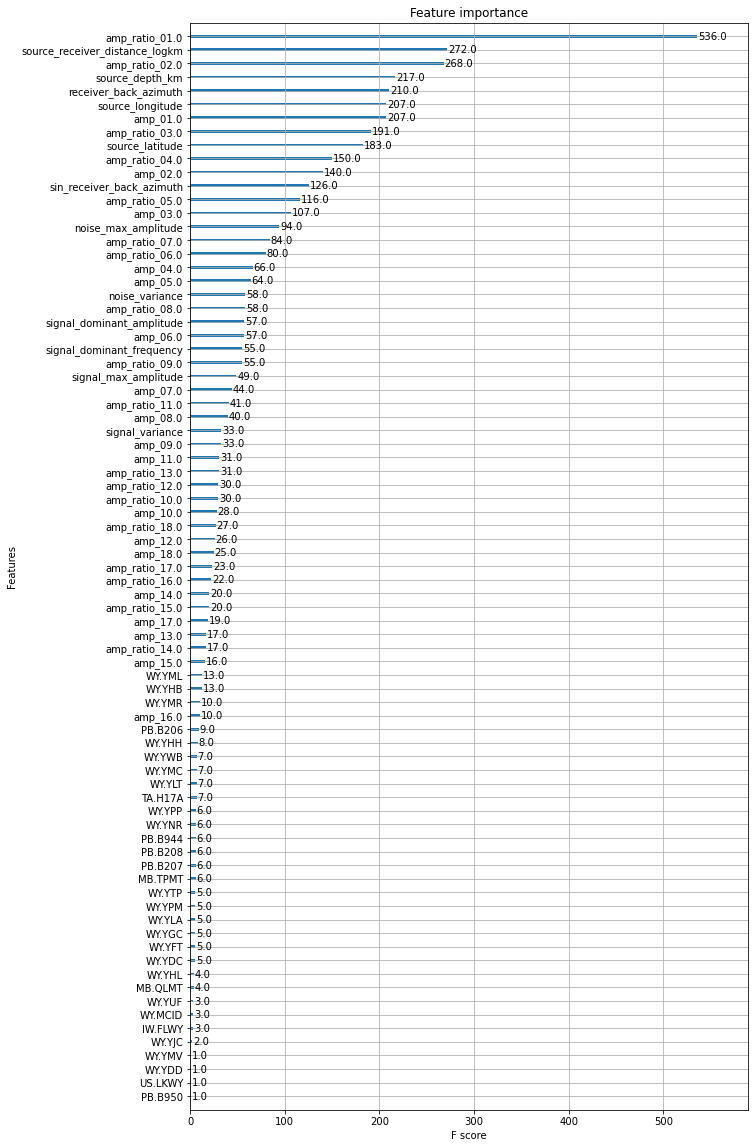

In [88]:
fig, ax = plt.subplots(1, figsize=(10, 20))
xgb.plot_importance(bst, ax=ax)

In [89]:
bst.best_score

0.164393

In [90]:
bst.best_iteration

9

In [92]:
dtest = train_feat_matrix[folds[0][1], :]
dtest_y = train_y[folds[0][1]]
dtest = xgb.DMatrix(dtest, label=dtest_y, feature_names=columns)
ypred = bst.predict(dtest)

In [93]:
ypred_train = bst.predict(dtrain)

In [94]:
from sklearn.metrics import r2_score
r2_score(dtest_y, ypred)

0.7419276723177408

Text(0.5, 0, 'actual')

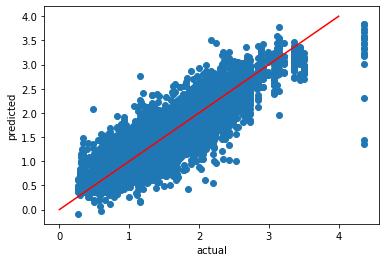

In [95]:
plt.scatter(deval_y, ypred)
plt.plot(np.arange(0, 5), np.arange(0, 5), color="r")
plt.ylabel("predicted")
plt.xlabel("actual")

Text(0.5, 0, 'actual')

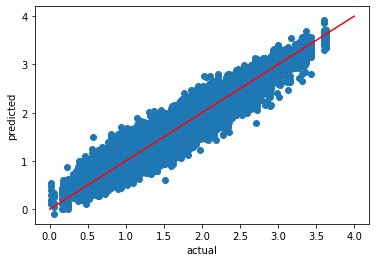

In [96]:
plt.scatter(dtrain_y, ypred_train)
plt.plot(np.arange(0, 5), np.arange(0, 5), color="r")
plt.ylabel("predicted")
plt.xlabel("actual")

In [97]:
r2_score(dtrain_y, ypred_train)

0.9175059644155158